# Study how to detect blurred images

**This project aims at reducing bandwidth taken by the image ROS topic of the pepper robot**

We want to filter out, blurred images to reduce amount of data we have to deal with inside the pipeline

In [46]:
# import the necessary packages
from imutils import paths
from matplotlib import pyplot as plt
import argparse
import cv2

In [47]:
blurred_image_path ='./motion_blurred'
sharp_image_path   ='./sharp'

threshold  = 100.0  # seems to be the best threshold for our dataset

In [48]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [51]:
def check_if_blurred(folder, threshold, logging=False):
    counter = 0
    total   = 0
    
    for image in paths.list_images(folder):
        
        image = cv2.imread(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fm = variance_of_laplacian(gray)
        
        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry"
        
        if fm < threshold:
            counter += 1

        total += 1
    
    if logging:
        print("Detected {} blurred images out of {}".format(counter, total))
        print("Blurred image ratio : {}".format(counter / total))
    
    return counter / total

In [53]:
check_if_blurred(blurred_image_path, threshold, logging=True)

Detected 227 blurred images out of 350
Blurred image ratio : 0.6485714285714286


0.6485714285714286

In [54]:
check_if_blurred(sharp_image_path, threshold, logging=True)

Detected 55 blurred images out of 350
Blurred image ratio : 0.15714285714285714


0.15714285714285714

## Check blurred images

In [55]:
image_generator = paths.list_images(blurred_image_path)
first_image = next(image_generator)

Blurry


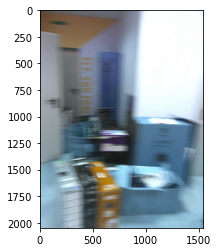

In [56]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)

## Check sharp images

In [57]:
image_generator = paths.list_images(sharp_image_path)
first_image = next(image_generator)

Sharp


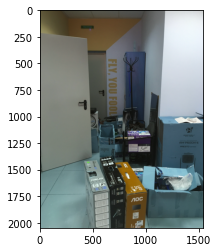

In [58]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)

## Compute ratio with different threshold

In [68]:
x_blurred = []
y_blurred = []
for threshold in range(90,110):
    x_blurred.append(threshold)
    y_blurred.append(check_if_blurred(blurred_image_path, threshold))

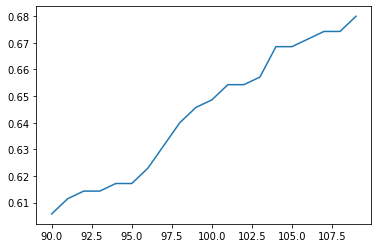

In [69]:
plt.plot(x_blurred, y_blurred)

In [65]:
x_sharp = []
y_sharp = []
for threshold in range(90,110):
    x_sharp.append(threshold)
    y_sharp.append(check_if_blurred(sharp_image_path, threshold))

In [78]:
y_blurred

[0.6057142857142858,
 0.6114285714285714,
 0.6142857142857143,
 0.6142857142857143,
 0.6171428571428571,
 0.6171428571428571,
 0.6228571428571429,
 0.6314285714285715,
 0.64,
 0.6457142857142857,
 0.6485714285714286,
 0.6542857142857142,
 0.6542857142857142,
 0.6571428571428571,
 0.6685714285714286,
 0.6685714285714286,
 0.6714285714285714,
 0.6742857142857143,
 0.6742857142857143,
 0.68]

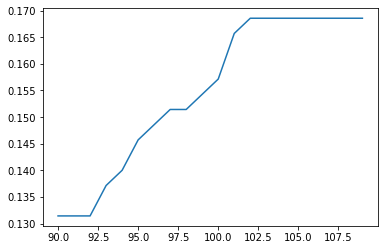

In [70]:
plt.plot(x_sharp, y_sharp)

In [75]:
y_sharp_inverted = [ 1- i for i in y_sharp]

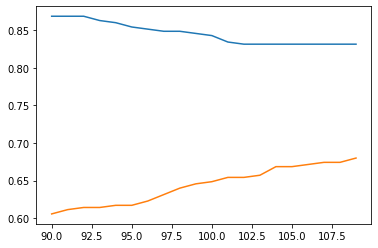

In [76]:
plt.plot(x_sharp, y_sharp_inverted, x_sharp, y_blurred)

In [67]:
y_sharp

[0.13142857142857142,
 0.13142857142857142,
 0.13142857142857142,
 0.13714285714285715,
 0.14,
 0.1457142857142857,
 0.14857142857142858,
 0.15142857142857144,
 0.15142857142857144,
 0.15428571428571428,
 0.15714285714285714,
 0.1657142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857,
 0.16857142857142857]

## Optimizing time
- pepper 10 images / seconds
- turtlebot 30 i/s

**Plusieurs pistes :**

- Subsampling image size => reduce size / resolution
- Multiprocessing
- Use reduces size of color encoding (Black and White or other)
- Face recognition
- Use dataset with human faces (more relevant in our case)
- Try Darknet